In [18]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_17.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_16.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_04.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_08.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_11.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_03.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_05.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_13.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_07.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_20.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_15.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_09.png
/kaggle/input/omniglot/images_evaluation/Sylheti/character15/1517_01.png
/kaggle/input/omniglot/images_evaluation/Sylheti/ch

In [19]:
import IPython
from IPython.display import display
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import tensorflow as tf
from tensorflow import keras
import random
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
path = r'/kaggle/input/omniglot/images_background/'
language = 'Arcadian'
os.chdir(path)
filenames = glob(path + language + '/*/*')
print(len(filenames))

520


In [21]:
def makeDataset(language):
    path = r'/kaggle/input/omniglot/images_background/'
    os.chdir(path)
    filenames = glob(path + language + '/*/*')
    random.shuffle(filenames)
    X, Y = [], []
    for name in filenames:
        img = ImageOps.grayscale(Image.open(name).resize((28, 28)))
        img = 1.0 - np.array(img, dtype = np.float64)
        X.append([img])
        y = np.zeros(len(os.listdir(os.path.join(path, language))))
        y[int(name.split('/')[-2][9:])-1] = 1
        Y.append([y])
    X = tf.concat(X, axis = 0)
    Y = tf.concat(Y, axis = 0)
    return tf.expand_dims(X, axis = -1)  , Y

In [22]:
DS0 = makeDataset("Latin")

In [23]:
DS0[0].shape, DS0[1].shape

(TensorShape([520, 28, 28, 1]), TensorShape([520, 26]))

tf.Tensor(
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(26,), dtype=float64)


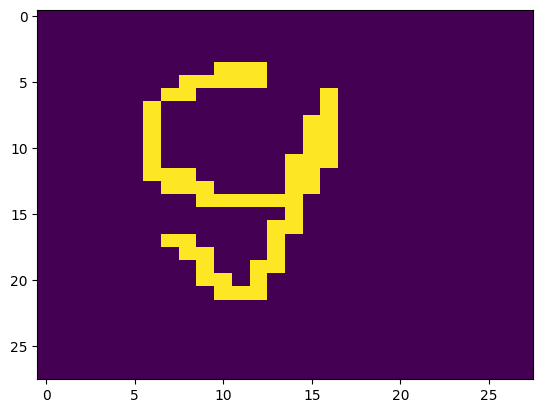

In [24]:
idx = 5
plt.imshow(np.squeeze(DS0[0][idx], axis = 2), aspect = 'auto')
# plt.imshow(DS0[0][idx], aspect = 'auto')
print(DS0[1][idx])

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
# model = Sequential()
# model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(105, 105, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(26, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# # Print the model summary
# model.summary()


In [26]:
# model.fit(DS0[0], DS0[1], batch_size = 256, epochs = 30,validation_split = 0.1, shuffle = True)

In [27]:
# new_model = Sequential(model.layers[:-2])
# new_model.summary()

In [28]:
Data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

Feature = Data.iloc[:, Data.columns != '0'].values
Label = Data[Data.columns[0]].values

X_train, X_test, Y_train, Y_test = train_test_split(Feature, Label, test_size=0.2)
X_train = np.array(X_train).reshape((X_train.shape[0], 28, 28, 1))
Y_train = np.array(Y_train)
X_test = np.array(X_test).reshape((X_test.shape[0], 28, 28, 1))
Y_test = np.array(Y_test)

In [29]:
Y_train_new = tf.keras.utils.to_categorical(Y_train, num_classes=26)
Y_test_new = tf.keras.utils.to_categorical(Y_test, num_classes=26)

In [30]:
Y_train_new.shape, Y_test_new.shape

((297960, 26), (74490, 26))

In [69]:
x_train = np.round(X_train/255.0)
x_test = np.round(X_test/255.0)

3


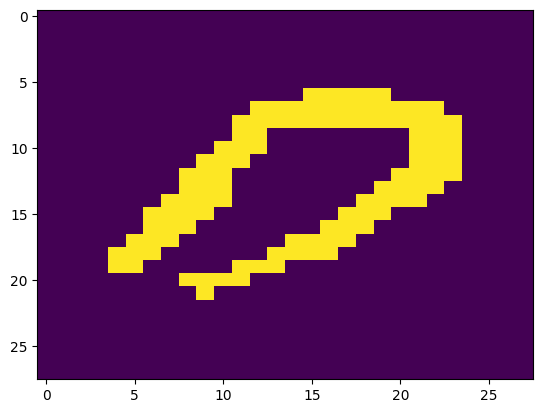

In [70]:
plt.imshow(x_train[99].reshape((28, 28)), aspect = 'auto')
print(Y_train[99])

In [71]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.004,
    beta_1=0.9,
    weight_decay=True,
    use_ema=True,
    ema_momentum=0.99
)

In [72]:
# Define the model
Model = Sequential()
Model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Model.add(MaxPooling2D(pool_size=(2, 2)))

Model.add(Conv2D(64, (3, 3), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))

Model.add(Dropout(0.5))
Model.add(Conv2D(64, (3, 3), activation='relu'))
# Model.add(MaxPooling2D(pool_size=(2, 2)))


Model.add(Flatten())
Model.add(Dense(26, activation='softmax'))
Model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print the model summary
Model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                      

In [74]:
Model.fit(x_train, Y_train_new, batch_size = 128, epochs = 3,validation_split = 0.1, shuffle = True)

Epoch 1/3
2096/2096 [==============================] - 448s 213ms/step - loss: 0.1957 - precision_8: 0.9593 - recall_8: 0.9327 - val_loss: 0.1790 - val_precision_8: 0.9572 - val_recall_8: 0.9381
Epoch 2/3
2096/2096 [==============================] - 428s 204ms/step - loss: 0.1593 - precision_8: 0.9635 - recall_8: 0.9455 - val_loss: 0.1733 - val_precision_8: 0.9582 - val_recall_8: 0.9413
Epoch 3/3
2096/2096 [==============================] - 428s 204ms/step - loss: 0.1580 - precision_8: 0.9634 - recall_8: 0.9462 - val_loss: 0.1480 - val_precision_8: 0.9680 - val_recall_8: 0.9491


In [96]:
Model.evaluate(x_test, Y_test_new)

2328/2328 [==============================] - 35s 15ms/step - loss: 0.0834 - precision_8: 0.9820 - recall_8: 0.9723


[0.08339623361825943, 0.9820215702056885, 0.9723318815231323]

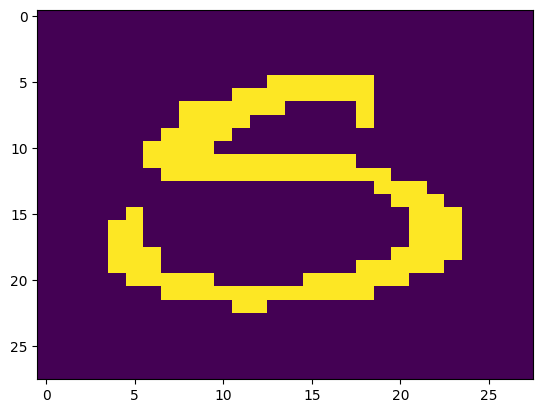

In [77]:
plt.imshow(np.round(X_train[10]/255.0), aspect = 'auto')

In [121]:
tmp = Sequential(Model.layers[:-2])
newModel = tf.keras.models.clone_model(tmp)
newModel.set_weights(tmp.get_weights())

In [122]:
newModel.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________

In [99]:
def make_tasks(language):
    X, Y = makeDataset(language)
    labelled = [[] for _ in range(Y.shape[1])]
    for i in range(Y.shape[0]):
        if labelled[np.argmax(Y[i])] == []:
            labelled[np.argmax(Y[i])].append([X[i]])
            labelled[np.argmax(Y[i])].append([Y[i]])
        else:
            labelled[np.argmax(Y[i])][0] = np.concatenate([labelled[np.argmax(Y[i])][0], [X[i]]])
            labelled[np.argmax(Y[i])][1] = np.concatenate([labelled[np.argmax(Y[i])][1], [Y[i]]])
    
    
    tasks = []
    for i in range(2):
        supportX = np.concatenate([labelled[j][0][i*5:(i+1)*5] for j in range(len(labelled))])
        supportY = np.concatenate([labelled[j][1][i*5:(i+1)*5] for j in range(len(labelled))])
        
        querryX = np.concatenate([labelled[j][0][i*5+10:(i+1)*5+10] for j in range(len(labelled))])
        querryY = np.concatenate([labelled[j][1][i*5+10:(i+1)*5+10] for j in range(len(labelled))])
        tasks.append([supportX, supportY, querryX, querryY])
    return tasks, X, Y
    
    

In [100]:
tasks, langX, langY = make_tasks("Latin")

In [101]:
# tasks[0][0].shape, tasks[0][1].shape, tasks[0][2].shape, tasks[0][3].shape
len(tasks)

2

In [152]:
optim = tf.keras.optimizers.legacy.Adam(
    learning_rate=0.002
)

In [129]:
metaModel = Sequential()
metaModel.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(10, 10, 64)))
metaModel.add(Dropout(0.5))
metaModel.add(Flatten())
metaModel.add(Dense(26, activation='softmax'))
metaModel.compile(loss='categorical_crossentropy', optimizer=optim, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print the model summary
metaModel.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          18464     
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 26)                53274     
                                                                 
Total params: 71,738
Trainable params: 71,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_fn=tf.keras.losses.CategoricalCrossentropy()
precision_metric = keras.metrics.Precision()
recall_metric = keras.metrics.Recall()


for epoch in range(200):
    print(f"start of epoch : {epoch+1}")
    
    
    with tf.GradientTape(persistent = True) as tape:
        
        for episode in range(1):
            outer_loss = None
            for task in tasks:

                clone_newModel = tf.keras.models.clone_model(newModel)
                clone_newModel.set_weights(newModel.get_weights())
                clone_metaModel = tf.keras.models.clone_model(metaModel)
                clone_metaModel.set_weights(metaModel.get_weights())



                y_pred = clone_metaModel(clone_newModel(task[0], training = True), training = True)
                loss = loss_fn(task[1], y_pred)
                gradients = tape.gradient(loss, clone_metaModel.trainable_weights)
                optim.apply_gradients(zip(gradients, clone_metaModel.trainable_weights))



                y_pred_new = clone_metaModel(clone_newModel(task[2], training = True), training = True)
                loss_new = loss_fn(task[3], y_pred_new)


                if outer_loss == None:
                    outer_loss = loss_new
                else:
                    outer_loss += loss_new

            clone_newModel.set_weights(newModel.get_weights())
            clone_metaModel.set_weights(metaModel.get_weights())

            newGradients = tape.gradient(outer_loss, clone_newModel.trainable_weights)
            optim.apply_gradients(zip(newGradients, newModel.trainable_weights))
            newGradients1 = tape.gradient(outer_loss, clone_metaModel.trainable_weights)
            optim.apply_gradients(zip(newGradients1, metaModel.trainable_weights))
        

In [171]:
new_metric = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
y_pred = metaModel(newModel(langX, training = False), training = False)
# y_pred = Model(x_test[:200], training = False)

In [172]:
for metric in new_metric:
    print(metric(langY, y_pred))

tf.Tensor(0.6, shape=(), dtype=float32)
tf.Tensor(0.6, shape=(), dtype=float32)


In [168]:
count = 0
for idx in range(200):
    count += np.argmax(y_pred[idx]) == np.argmax(langY[idx])

In [169]:
count/y_pred.shape[0]

0.18846153846153846

13 1 tf.Tensor(0.97692853, shape=(), dtype=float32)


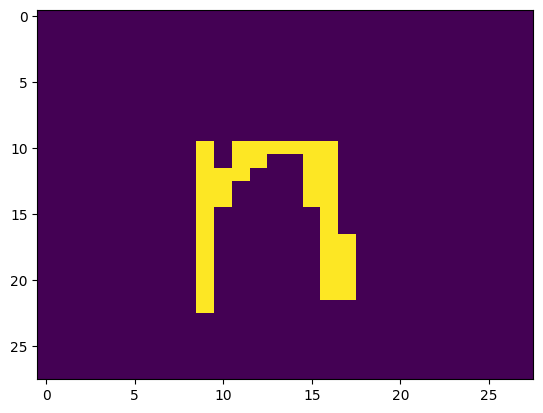

In [161]:
# newDataset = makeDataset("Latin")
idx = 18
plt.imshow(np.reshape(langX[idx], ((28, 28))), aspect = 'auto')
print(np.argmax(langY[idx]), np.argmax(y_pred[idx]), max(y_pred[idx]))